## Observations and Insights 

In [443]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')

# Display the data table for preview
combined_study_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [444]:
# Checking the number of mice.
Mice_count = combined_study_df["Mouse ID"].value_counts()
Mice_count 

g989    13
m546    10
w422    10
q597    10
j119    10
        ..
x336     1
f932     1
l872     1
t573     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [445]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
no = combined_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_loc = combined_study_df.loc[combined_study_df.duplicated(subset=['Mouse ID', 'Timepoint']), :]
duplicate_loc

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [446]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_loc_byid = duplicate_loc['Mouse ID'].unique()
duplicate_loc_byid


array(['g989'], dtype=object)

In [447]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#combined_study_clean_df= combined_study_df.loc[combined_study_df['Mouse ID'] != [duplicate_loc_byid]]
combined_study_clean_df= combined_study_df[~combined_study_df['Mouse ID'].isin(duplicate_loc_byid)]
combined_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [448]:
# Checking the number of mice in the clean DataFrame.
Mice_count_clean = combined_study_clean_df["Mouse ID"].value_counts()
Mice_count_clean

m546    10
w422    10
q597    10
j119    10
q511    10
        ..
o848     1
b447     1
l872     1
u153     1
d133     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [449]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group Data
Grouped_Stats_df = combined_study_clean_df.groupby(['Drug Regimen'])
Grouped_mean_df = Grouped_Stats_df['Tumor Volume (mm3)'].mean()
Grouped_median_df = Grouped_Stats_df['Tumor Volume (mm3)'].median()
Grouped_variance_df =Grouped_Stats_df['Tumor Volume (mm3)'].var()
Grouped_Stdev_df =Grouped_Stats_df['Tumor Volume (mm3)'].std()
Grouped_sterr_df = Grouped_Stats_df['Tumor Volume (mm3)'].sem()

Summary_table = {
                 "Tumor volume (mm3) Mean": Grouped_mean_df, 
                 "Tumor volume (mm3) Median": Grouped_median_df, 
                 "Tumor volume (mm3) Variance":Grouped_variance_df, 
                 "Tumor volume (mm3) Standard Dev":Grouped_Stdev_df,
                 "Tumor volume (mm3) Standard Error":Grouped_sterr_df,
                }
Summary_table_df = pd.DataFrame(Summary_table)
Summary_table_df

,Tumor volume (mm3) Mean,Tumor volume (mm3) Median,Tumor volume (mm3) Variance,Tumor volume (mm3) Standard Dev,Tumor volume (mm3) Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [450]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
combined_study_clean_df.groupby(['Drug Regimen']).agg(
 
     Mean=('Tumor Volume (mm3)', "mean"),
     Median=('Tumor Volume (mm3)', "median"),
     Variance=('Tumor Volume (mm3)', "var"),
     StandardDev=('Tumor Volume (mm3)', "std"),
     StandardErr=('Tumor Volume (mm3)', "sem")
 )


,Mean,Median,Variance,StandardDev,StandardErr
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Timepoints'>

<Figure size 432x288 with 0 Axes>

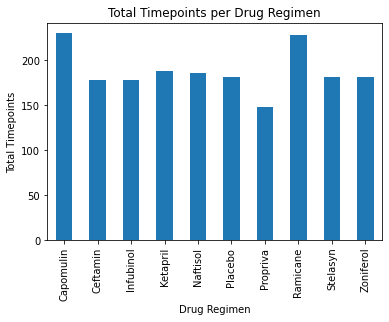

In [451]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Grouped_Regimen_df = combined_study_clean_df.groupby(['Drug Regimen']).count()

plt.figure()
Grouped_Regimen_df.plot(kind="bar", y='Timepoint', xlabel="Drug Regimen", ylabel="Total Timepoints", legend=False, title="Total Timepoints per Drug Regimen")

Text(0, 0.5, 'Total Timepoints')

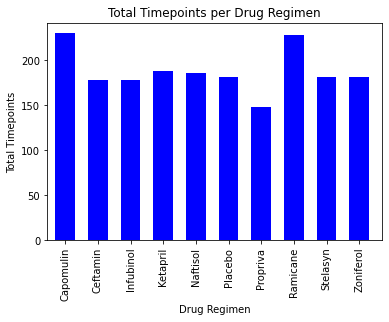

In [452]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(Grouped_Regimen_df))
tick_locations = [value+0.3 for value in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis, Grouped_Regimen_df["Timepoint"], color='b', alpha=1, align="edge", width=0.6)
plt.xticks(tick_locations, list(Grouped_Regimen_df.index), rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")

<AxesSubplot:ylabel='Mouse ID'>

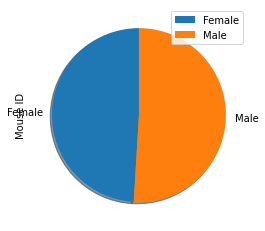

In [453]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_study_clean_df.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID', shadow = True, startangle=90)


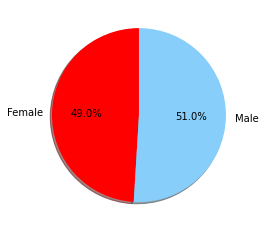

In [454]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Grouped_Gender_df = combined_study_clean_df.groupby(['Sex']).count()
Lables = Grouped_Gender_df.index
sizes = Grouped_Gender_df.iloc[:,1]
colors = ["red", "lightskyblue"]
plt.pie(sizes, labels=Lables, colors=colors,  autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()


## Quartiles, Outliers and Boxplots

In [585]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Grouped_mouse = combined_study_clean_df.groupby(["Mouse ID"]).max()
combined_max_study_df = pd.merge(Grouped_mouse, combined_study_clean_df, how='inner', on='Mouse ID')
combined_max_filtered_study_df = combined_max_study_df['Drug Regimen_x'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
combined_max_study= combined_max_study_df[combined_max_filtered_study_df]
Grouped_final = combined_max_study.groupby(["Mouse ID"]).max()
Grouped_final


,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
Mouse ID,,,,,,,,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,45.466677,1,Ramicane,Male,3,22,45,45.466677,1
a444,Ramicane,Female,10,25,45,45.000000,0,Ramicane,Female,10,25,45,45.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,45.000000,2,Capomulin,Male,17,17,45,45.000000,2
y865,Ceftamin,Male,23,26,45,64.729837,3,Ceftamin,Male,23,26,45,64.729837,3


In [612]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
Treatments = Grouped_final['Drug Regimen_x'].unique()

Tumor_vol_Infubinol = Grouped_final[Grouped_final['Drug Regimen_x'] == "Infubinol"]
Tumor_vol_Ceftamin = Grouped_final[Grouped_final['Drug Regimen_x'] == "Ceftamin"]
Tumor_vol_Ramicane = Grouped_final[Grouped_final['Drug Regimen_x'] == "Ramicane"]
Tumor_vol_Capomulin = Grouped_final[Grouped_final['Drug Regimen_x'] == "Capomulin"]

quartilesI = Tumor_vol_Infubinol['Tumor Volume (mm3)_x'].quantile([.25,.5,.75])
lowerqI = quartilesI[0.25]
upperqI = quartilesI[0.75]
iqrI = upperqI-lowerqI
lower_boundI = lowerqI - (1.5*iqrI)
upper_boundI = upperqI + (1.5*iqrI)

quartilesC = Tumor_vol_Ceftamin['Tumor Volume (mm3)_x'].quantile([.25,.5,.75])
lowerqC = quartilesC[0.25]
upperqC = quartilesC[0.75]
iqrC = upperqC -lowerqC 
lower_boundC = lowerqC  - (1.5*iqrC )
upper_boundC = upperqC  + (1.5*iqrC )

quartilesR = Tumor_vol_Ramicane['Tumor Volume (mm3)_x'].quantile([.25,.5,.75])
lowerqR = quartilesR[0.25]
upperqR = quartilesR[0.75]
iqrR = upperqR-lowerqR
lower_boundR = lowerqR - (1.5*iqrR)
upper_boundR= upperqR + (1.5*iqrR)

quartilesCP = Tumor_vol_Capomulin['Tumor Volume (mm3)_x'].quantile([.25,.5,.75])
lowerqCP = quartilesCP[0.25]
upperqCP = quartilesCP[0.75]
iqrCP = upperqCP-lowerqCP
lower_boundCP = lowerqCP - (1.5*iqrCP)
upper_boundCP = upperqCP + (1.5*iqrCP)


Tumor_vol_Outlier_I= Tumor_vol_Infubinol.loc[(Tumor_vol_Infubinol['Tumor Volume (mm3)_x'] < lower_boundI) | (Tumor_vol_Infubinol['Tumor Volume (mm3)_x'] > upper_boundI)]
Tumor_vol_Outlier_C = Tumor_vol_Ceftamin.loc[(Tumor_vol_Ceftamin['Tumor Volume (mm3)_x'] < lower_boundC) | (Tumor_vol_Ceftamin['Tumor Volume (mm3)_x'] > upper_boundC)]
Tumor_vol_Outlier_R = Tumor_vol_Ramicane.loc[(Tumor_vol_Ramicane['Tumor Volume (mm3)_x'] < lower_boundR) | (Tumor_vol_Ramicane['Tumor Volume (mm3)_x'] > upper_boundR)]
Tumor_vol_Outlier_CP = Tumor_vol_Capomulin.loc[(Tumor_vol_Capomulin['Tumor Volume (mm3)_x'] < lower_boundCP) | (Tumor_vol_Capomulin['Tumor Volume (mm3)_x'] > upper_boundCP)]


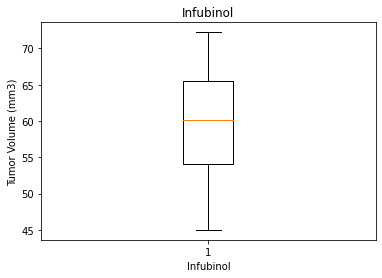

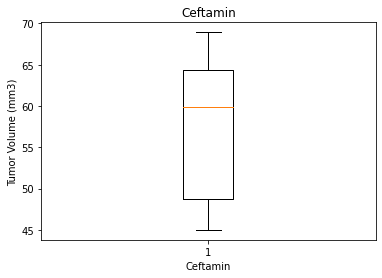

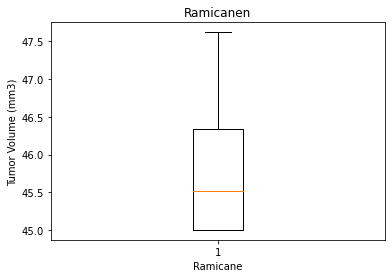

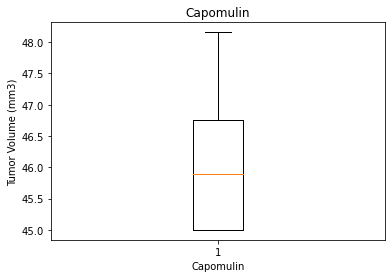

In [624]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Infubinol')
ax1.boxplot(Tumor_vol_Infubinol['Tumor Volume (mm3)_x'])

fig2, ax2 = plt.subplots()
ax2.set_title('Ceftamin')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Ceftamin')
ax2.boxplot(Tumor_vol_Ceftamin['Tumor Volume (mm3)_x'])

fig3, ax3 = plt.subplots()
ax3.set_title('Ramicanen')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.set_xlabel('Ramicane')
ax3.boxplot(Tumor_vol_Ramicane['Tumor Volume (mm3)_x'])

fig4, ax4 = plt.subplots()
ax4.set_title('Capomulin')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.set_xlabel('Capomulin')
ax4.boxplot(Tumor_vol_Capomulin['Tumor Volume (mm3)_x'])

plt.show()

## Line and Scatter Plots

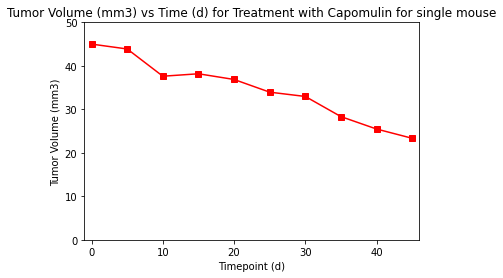

In [433]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_cleaned = combined_study_clean_df[combined_study_clean_df["Drug Regimen"] == 'Capomulin']
Mice_df = Capomulin_cleaned[Capomulin_cleaned["Mouse ID"].isin(Capomulin_cleaned.iloc[0:1,0])]

volume = Mice_df["Tumor Volume (mm3)"]
time = Mice_df["Timepoint"]

plt.plot(time, volume, marker ='s', color='red')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (d)')
plt.title('Tumor Volume (mm3) vs Time (d) for Treatment with Capomulin for single mouse')

plt.xlim(-1,46)
plt.ylim(0,50)
plt.show()

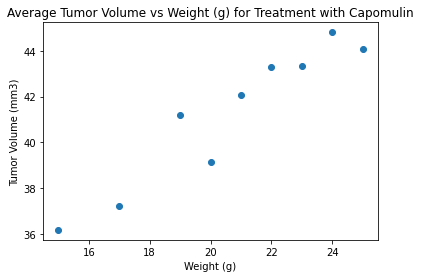

In [406]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_cleaned = combined_study_clean_df[combined_study_clean_df["Drug Regimen"] == 'Capomulin']
Capomlin_grouped = Capomulin_cleaned.groupby(["Weight (g)"]).mean()
volume = Capomlin_grouped["Tumor Volume (mm3)"]
weight = Capomlin_grouped.index

plt.scatter(weight,volume)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Average Tumor Volume vs Weight (g) for Treatment with Capomulin')
plt.show()

## Correlation and Regression

The linear regression is: y = 0.89x + 22.76
The r-squared is: 0.9034966277438606
The correlation between both factors is 0.95


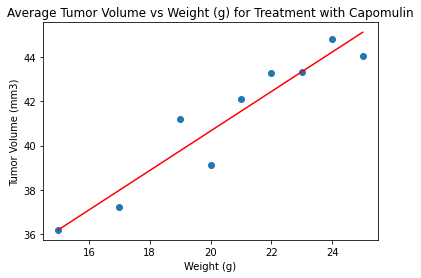

In [428]:
correlation = st.pearsonr(volume,weight)

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)

plt.plot(weight,regress_values,"r-")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Average Tumor Volume vs Weight (g) for Treatment with Capomulin')
print(f"The linear regression is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()